In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftfreq

def heatBackwardEuler(*, kappa, U0, t0, T, X, Y, Nt, g=None):
    x, y = X[0,:], Y[:,0]
    Nx, Ny = len(x), len(y)
    dx, dy = x[1] - x[0], y[1] - y[0]

    kx = fftfreq(Nx, d=dx/(2*np.pi))
    ky = fftfreq(Ny, d=dy/(2*np.pi))
    KX, KY = np.meshgrid(kx, ky, sparse = True)
    K2 = KX**2 + KY**2

    # Time-stepping
    t = t0
    dt = (T-t0)/Nt

    UHat = fft2(U0)
    yield (UHat, t)

    while (t < T - dt/2):
        if g is not None:
            GHat = fft2(g(X, Y, t + dt))
        else:
            GHat = 0

        UHat = (UHat + dt * GHat) / (1 + dt * kappa * K2)
        t = t + dt
        yield (UHat, t)


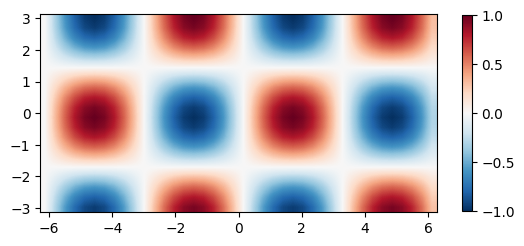

In [6]:
def uEx(x, y, t):
    return np.sin(x) * np.cos(y) * np.exp(-2 * kappa * t)

kappa = 1
Lx, Ly = 4*np.pi, 2*np.pi
Nx, Ny = 40, 20
x = np.linspace(-Lx/2, Lx/2, Nx, endpoint = False)
y = np.linspace(-Ly/2, Ly/2, Ny, endpoint = False)
X, Y = np.meshgrid(x, y, sparse = True)
t0, T = 0, 1
U0 = uEx(X, Y, t0)
Nt = 10

plt.imshow(U0, cmap = "RdBu_r", interpolation = "bilinear", extent = [-Lx/2, Lx/2, -Ly/2, Ly/2])
plt.colorbar(shrink = 0.53)
plt.show()


In [18]:
solver = heatBackwardEuler(kappa=kappa, U0=U0, t0=t0, T=T, X=X, Y=Y, Nt=Nt, g=None)

for UHat, t in solver:
    U = ifft2(UHat).real
    print(np.max(np.abs(uEx(X, Y, t) - U)))

4.440892098500626e-16
0.014602580255351771
0.024124398408805425
0.029892067609677553
0.03292412230253189
0.03399813084501879
0.03370376476818221
0.03248468329204715
0.030671521366722604
0.02850781124622853
0.026170299653233198
